# machine learning classification

In [1]:
from sklearn import preprocessing

from sklearn import utils

from sklearn.metrics import scorer

from sklearn.metrics import accuracy_score

from sklearn.svm import SVC

from sklearn.cross_validation import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline

#from sklearn.grid_search import GridSearchCV, RandomizedSearchCV

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# For data manipulation

In [2]:
import pandas as pd

import numpy as np


# To plot

In [3]:
import matplotlib.pyplot as plt

import seaborn

# sql import

In [4]:
import psycopg2
import datetime


# Load dataset Read sqlite query results into a pandas DataFrame

In [5]:
### Database connection

conn_string = "host='localhost' dbname='stockmarket' user='postgres' password='123456'"
conn = psycopg2.connect(conn_string)

## Read dataset

df = pd.read_sql_query(
    '''select i.date ,i.open ,i.high ,i.low ,i.close ,i.adj_close ,i.volume ,c.name
    from information i 
    join company c
    on i.company_id=c.id
    where company_id = {}'''.format(3)  , conn, index_col='date')
df.index = pd.to_datetime(df.index)


# Verify that result of SQL query is stored in the dataframe


In [6]:
print(df.head())

                open      high       low     close  adj_close      volume  \
date                                                                        
1986-03-12  0.444196  0.448661  0.441964  0.441964   0.020108  21420000.0   
1986-03-13  0.441964  0.446429  0.435268  0.441964   0.020108  28991200.0   
1986-03-14  0.441964  0.468750  0.441964  0.466518   0.021225  96213600.0   
1986-03-17  0.464286  0.464286  0.453125  0.464286   0.021123  29680000.0   
1986-03-18  0.464286  0.486607  0.462054  0.479911   0.021834  62339200.0   

            name  
date              
1986-03-12  AAPL  
1986-03-13  AAPL  
1986-03-14  AAPL  
1986-03-17  AAPL  
1986-03-18  AAPL  


## adding  features

In [7]:
conn.close()

df= df.dropna()

df['open-close'] = df.open - df.close

df['high-low'] = df.high - df.low

# Organize our data select the target

In [8]:
feature_cols = ['open-close', 'high-low']

x = df[feature_cols]

y = np.where(df['close'].shift(-1) > df['close'], 1, -1)

print(x.head(),'\n',y[1:5])

            open-close  high-low
date                            
1986-03-12    0.002232  0.006697
1986-03-13    0.000000  0.011161
1986-03-14   -0.024554  0.026786
1986-03-17    0.000000  0.011161
1986-03-18   -0.015625  0.024553 
 [ 1 -1  1 -1]


### Test and train dataset splitIn this step, we will split data into the train dataset and the test dataset :
#### 1-First, 80% of data is used for training and remaining data for testing
#### 2-X_train and y_train are train dataset
#### 3-X_test and y_test are test dataset


In [9]:
split_percentage = 0.8

split = int(split_percentage*len(df))
# Train data set

x_train = x[:split]

y_train = y[:split]
# Test data set

x_test = x[split:]

y_test = y[split:]

# Create the machine learning classification model using the train dataset We will create the machine learning classification model based on the train dataset.This model will be later used to predict the trading signal in the test dataset.


In [10]:
cls = SVC().fit(x_train, y_train)


# The classification model accuracyWe will compute the accuracy of the classification model on the train and test dataset, by comparing the actual values of the trading signal with the predicted values of the trading signal.The function accuracy_score() will be used to calculate the accuracy.Syntax: accuracy_score(target_actual_value,target_predicted_value)

#### 1-target_actual_value: correct signal values

#### 2-target_predicted_value: predicted signal values

In [11]:
accuracy_train = accuracy_score(y_train, cls.predict(x_train))

accuracy_test = accuracy_score(y_test, cls.predict(x_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))

print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 52.29%
Test Accuracy: 51.05%


###  will predict the signal (buy or sell) for the test data set, using the cls.predict() function. Then, we will compute the strategy returns based on the signal predicted by the model in the test dataset. We save it in the column ‘Strategy_Return’ and then,plot the cumulative strategy returns.

In [12]:
df['Predicted_Signal'] = cls.predict(x)

print(df['Predicted_Signal'].head())

date
1986-03-12   -1
1986-03-13   -1
1986-03-14   -1
1986-03-17   -1
1986-03-18   -1
Name: Predicted_Signal, dtype: int32


# Calculate log returns

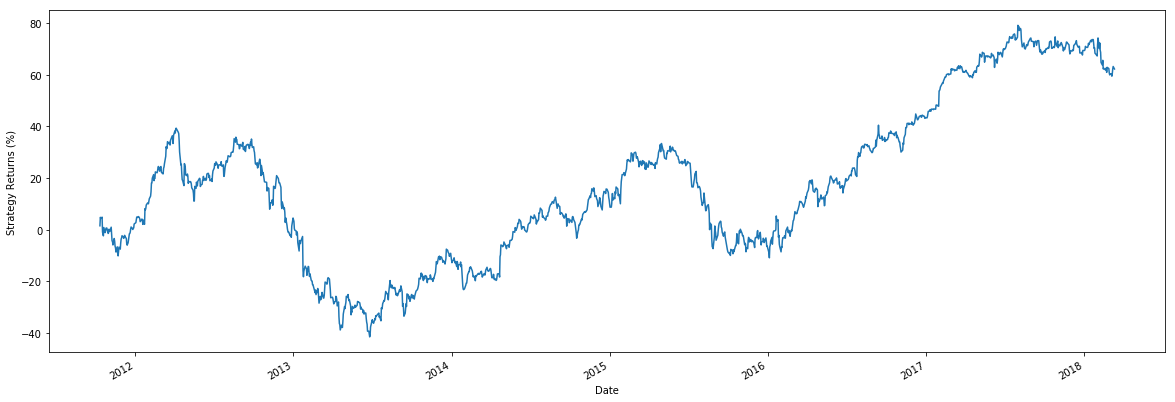

In [14]:
df['Return'] = np.log(df.close.shift(-1) / df.close)*100

df['Strategy_Return'] = df.Return * df.Predicted_Signal

df.Strategy_Return.iloc[split:].cumsum().plot(figsize=(20,7))

plt.xlabel("Date")

plt.ylabel("Strategy Returns (%)")

plt.show()